In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
def vectorize_sequences(sequences,dimension=10000):
 results=np.zeros((len(sequences),dimension))
 for i, sequence in enumerate(sequences):
   results[i,sequence]=1
 return results
#turn all samples into tensors

In [ ]:

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_test[2500]

0.0

In [ ]:
#build the network
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(17,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(17,activation='relu'))
model.add(layers.Dense(17,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
#split the train data into training andvalidation sets
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [ ]:
history=model.fit(partial_x_train,partial_y_train,epochs=15,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/15
30/30 [==============================] - 3s 55ms/step - loss: 0.5169 - accuracy: 0.7675 - val_loss: 0.3669 - val_accuracy: 0.8764
Epoch 2/15
30/30 [==============================] - 1s 39ms/step - loss: 0.2854 - accuracy: 0.9039 - val_loss: 0.3283 - val_accuracy: 0.8636
Epoch 3/15
30/30 [==============================] - 1s 41ms/step - loss: 0.2060 - accuracy: 0.9324 - val_loss: 0.2761 - val_accuracy: 0.8898
Epoch 4/15
30/30 [==============================] - 1s 40ms/step - loss: 0.1598 - accuracy: 0.9481 - val_loss: 0.3243 - val_accuracy: 0.8743
Epoch 5/15
30/30 [==============================] - 1s 40ms/step - loss: 0.1282 - accuracy: 0.9590 - val_loss: 0.4392 - val_accuracy: 0.8380
Epoch 6/15
30/30 [==============================] - 1s 48ms/step - loss: 0.1083 - accuracy: 0.9658 - val_loss: 0.3145 - val_accuracy: 0.8812
Epoch 7/15
30/30 [==============================] - 1s 43ms/step - loss: 0.0827 - accuracy: 0.9747 - val_loss: 0.4213 - val_accuracy: 0.8646
Epoch 8/15
30

In [ ]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.6409 - accuracy: 0.8554


In [ ]:
from keras import regularizers

model2=models.Sequential()
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='accuracy')
model2.add(layers.Dense(17,activation='relu',input_shape=(10000,)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(17,activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1,activation='sigmoid'))

#split the train data into training and validation sets
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
history=model2.fit(partial_x_train,partial_y_train,epochs=15,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/15
30/30 [==============================] - 2s 48ms/step - loss: 0.6243 - accuracy: 0.6403 - val_loss: 0.5111 - val_accuracy: 0.8291
Epoch 2/15
30/30 [==============================] - 1s 38ms/step - loss: 0.4950 - accuracy: 0.7801 - val_loss: 0.3936 - val_accuracy: 0.8715
Epoch 3/15
30/30 [==============================] - 1s 38ms/step - loss: 0.4084 - accuracy: 0.8389 - val_loss: 0.3269 - val_accuracy: 0.8830
Epoch 4/15
30/30 [==============================] - 1s 38ms/step - loss: 0.3457 - accuracy: 0.8757 - val_loss: 0.2967 - val_accuracy: 0.8879
Epoch 5/15
30/30 [==============================] - 1s 38ms/step - loss: 0.2902 - accuracy: 0.8982 - val_loss: 0.2829 - val_accuracy: 0.8858
Epoch 6/15
30/30 [==============================] - 1s 39ms/step - loss: 0.2509 - accuracy: 0.9179 - val_loss: 0.2740 - val_accuracy: 0.8911
Epoch 7/15
30/30 [==============================] - 1s 40ms/step - loss: 0.2186 - accuracy: 0.9269 - val_loss: 0.3158 - val_accuracy: 0.8797
Epoch 8/15
30

In [ ]:

results = model2.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.4843 - accuracy: 0.8736


In [ ]:
results2 = model2.predict(x_test)
print(results2)
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, results2.round())
print(accuracy)
recall = metrics.recall_score(y_test, results2.round())
print(recall)
precision = metrics.precision_score(y_test, results2.round())
print(precision)
F1 = metrics.f1_score(y_test, results2.round())
print(F1)

[[0.06239581]
 [1.        ]
 [0.99999905]
 ...
 [0.00688404]
 [0.0151934 ]
 [0.8213564 ]]
0.8736
0.89576
0.8577447525662633
0.8763402989747202


In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

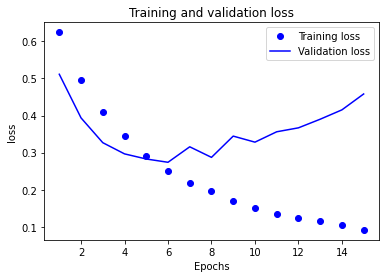

In [ ]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
acc=history_dict['accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

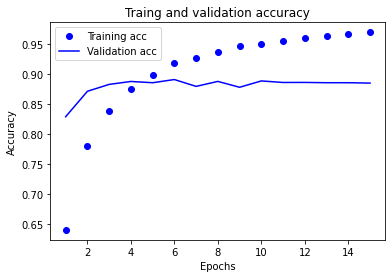

In [ ]:
plt.clf()
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()